# 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。

sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

pandas.DataFrame — pandas 0.24.2 documentation

目的変数も同様にyに格納してください。

In [7]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
#keyを確認
load_iris().keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y = pd.DataFrame(data=iris.target, columns=['species'])
y.head()

,species
0,0
1,0
2,0
3,0
4,0


# 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [10]:
#concat
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
#merge
df1 = pd.merge(X, y, left_index=True, right_index=True)
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# 関数無し
#Xの値が変化しないように値渡し
df2 = X.copy()
df2['species'] = y.values
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

・先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）

・ラベルごとのサンプル数の合計を出力する。

・特徴量に欠損値があるかを確認する。

・特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [13]:
# 先頭から４番目までの表示
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [45]:
# 各特徴量の情報
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [46]:
# ラベルごとのサンプル数の合計
df['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [47]:
# 特徴量に欠損値があるか

#isnullで各列毎で識別(isnaでもOK)
#→valuesで個々のデータにアクセス
#→sumでTrue数を合算
df.isnull().values.sum()

0

In [48]:
#dfのvaluesにアクセスし、numpyとして欠損値を確認
import numpy as np
np.isnan(df.values).sum()

0

In [49]:
# 特徴量の平均と標準偏差、四分位数
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

In [50]:
# DESCRで内容確認
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

In [51]:
# sepal_widthの列を３つの異なる方法で抽出する

# １：列名、２：iloc(列番号)、３：loc(列名)
# 最初の五行を出力
print(df['sepal width (cm)'].head())
print(df.iloc[:, 1].head())
print(df.loc[:, 'sepal width (cm)'].head())

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64
0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64
0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64


In [52]:
# 50番目から99番目までのデータを抽出する

#ilocでは位置index参照のため100まで
df.iloc[50:100, :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [53]:
# petal_lengthの列の50番目から99番目までのデータを抽出する

#ixは非推奨　print(df.ix[50:99, 'petal length (cm)'])
#locではラベルインデックス参照のため９９まで
df.loc[50:99, 'petal length (cm)']

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal length (cm), dtype: float64

In [54]:
# petal_widthの値が0.2のデータを抽出する
df[df['petal width (cm)'] == 0.2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


# 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

・ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

・特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

・特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

・箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

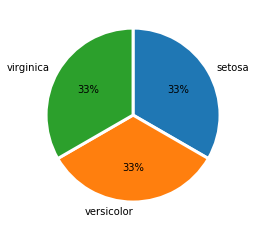

In [56]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

# 名前はirisのtarget_namesから取得
plt.pie(df['species'].value_counts(),
        labels=iris['target_names'], autopct='%d%%',
        wedgeprops={'linewidth': 3, 'edgecolor':"white"},
        startangle=90, counterclock=False)
plt.show()

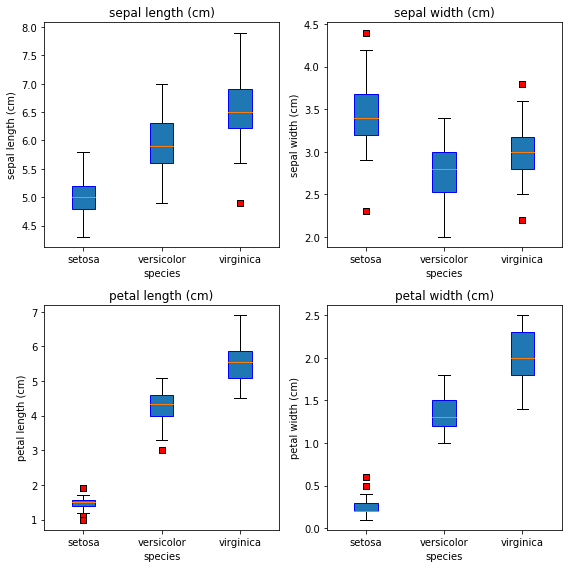

In [57]:
# 特徴量を一つずつ選び、箱ひげ図を使って
#ラベルごとのデータの分布を可視化する

# 各ラベル毎で要素を抽出
# インデックスはズレるためreset_index
species_0 = df[df['species']==0].iloc[:, 0:4].reset_index(drop=True)
species_1 = df[df['species']==1].iloc[:, 0:4].reset_index(drop=True)
species_2 = df[df['species']==2].iloc[:, 0:4].reset_index(drop=True)

#特徴量毎のリストを格納する空リスト
species_list = []
# ２×２グラフにするためサイズ調整
plt.figure(figsize=(8, 8))

# forで特徴量毎にリスト化、グラフ作成
for i in range(len(df.columns.values)-1):    
    
    # datafameを直接boxplotすると行ごとのデータになる
    # そのため、データをリストとして結合
    species_list_i = []
    species_list_i.append(species_0.iloc[:, i])
    species_list_i.append(species_1.iloc[:, i])
    species_list_i.append(species_2.iloc[:, i])
    # さらにまとめてリストに格納
    species_list.append(species_list_i)

    # 箱ひげ図
    plt.subplot(2, 2, i+1)
    plt.boxplot(species_list[i],
                     flierprops={'markerfacecolor':'r', 'marker':'s'},
                     boxprops={'color':'b'}, patch_artist=True,
                     labels=iris['target_names'])
    plt.title(df.columns.values[i])
    plt.ylabel(df.columns.values[i])
    plt.xlabel(df.columns.values[-1])
    #plt.xticks([1, 2, 3],iris['target_names'])：boxplotのlabelsでOK

# ２×２ではグラフが重なるためtight_layout実施
plt.tight_layout()
plt.show()

In [58]:
# 各々のラベルでの平均値などを確認

# 列名が被ってるため列名の変更
# speciesでまとめたdfを作成
species_df = pd.concat([species_0.add_prefix('0_'),
                                     species_1.add_prefix('1_'),
                                     species_2.add_prefix('2_')], axis=1)

species_df.describe()

,0_sepal length (cm),0_sepal width (cm),0_petal length (cm),0_petal width (cm),1_sepal length (cm),1_sepal width (cm),1_petal length (cm),1_petal width (cm),2_sepal length (cm),2_sepal width (cm),2_petal length (cm),2_petal width (cm)
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.428000,1.462000,0.246000,5.936000,2.770000,4.260000,1.326000,6.58800,2.974000,5.552000,2.02600
std,0.35249,0.379064,0.173664,0.105386,0.516171,0.313798,0.469911,0.197753,0.63588,0.322497,0.551895,0.27465
min,4.30000,2.300000,1.000000,0.100000,4.900000,2.000000,3.000000,1.000000,4.90000,2.200000,4.500000,1.40000
25%,4.80000,3.200000,1.400000,0.200000,5.600000,2.525000,4.000000,1.200000,6.22500,2.800000,5.100000,1.80000
50%,5.00000,3.400000,1.500000,0.200000,5.900000,2.800000,4.350000,1.300000,6.50000,3.000000,5.550000,2.00000
75%,5.20000,3.675000,1.575000,0.300000,6.300000,3.000000,4.600000,1.500000,6.90000,3.175000,5.875000,2.30000
max,5.80000,4.400000,1.900000,0.600000,7.000000,3.400000,5.100000,1.800000,7.90000,3.800000,6.900000,2.50000


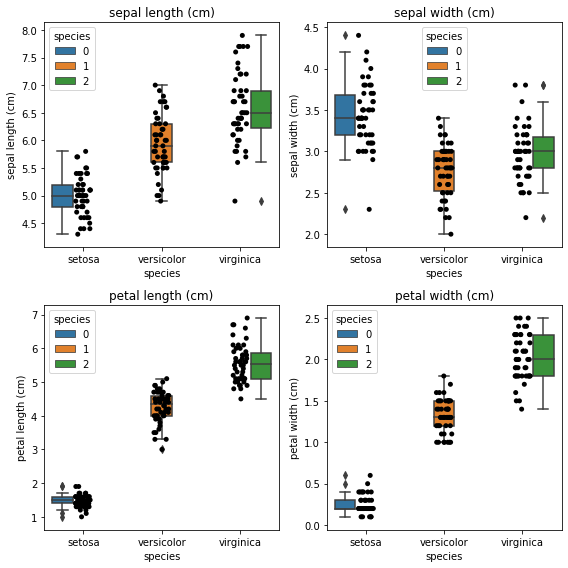

In [71]:
# グラフ化の別方法

# seabornでの箱ひげ図
# ２×２グラフにするためサイズ調整
plt.figure(figsize=(8, 8))

# forで特徴量毎にリスト化、グラフ作成
for i in range(len(df.columns.values)-1):    
    
    # 箱ひげ図
    # 元のdataframeを使用
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=df.columns[i],
                      data=df, hue='species')
    # 散布図も同時に表示
    sns.stripplot(x='species', y=df.columns[i],
                       data=df, dodge=True, jitter=True, color='black')
    plt.title(df.columns.values[i])
    plt.ylabel(df.columns.values[i])
    plt.xticks([0, 1, 2],iris['target_names'])
    # plt.legend(iris['target_names'])

# ２×２ではグラフが重なるためtight_layout実施
plt.tight_layout()
plt.show()

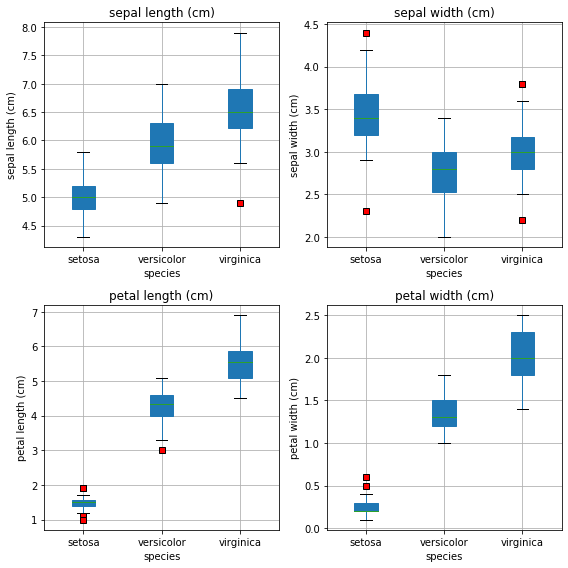

In [60]:
# グラフ化の別方法

# describeに使用したdataframeを使用する
# そのためにitemgetterで非連続column名を同時に複数取り出す
# ただし、取り出す列が連続であればスライスでOK (dataframeの作り方)
from operator import itemgetter

# ２×２グラフにするためサイズ調整
plt.figure(figsize=(8, 8))

# forで特徴量毎にリスト化、グラフ作成
for i in range(len(df.columns.values)-1):    
    # 箱ひげ図
    plt.subplot(2, 2, i+1)
    # plt.boxplotではitemgetterを使用した方法がエラー
    species_df.boxplot(
        column=[*itemgetter(i, i+4, i+8)(species_df.columns)],
        flierprops={'markerfacecolor':'r', 'marker':'s'},
        boxprops={'color':'b'}, patch_artist=True)
        #labels=iris['target_names：何故か効果でない
    plt.title(df.columns.values[i])
    plt.ylabel(df.columns.values[i])
    plt.xlabel(df.columns.values[-1])
    plt.xticks([1, 2, 3],iris['target_names'])

# ２×２ではグラフが重なるためtight_layout実施
plt.tight_layout()
# グラフ化の別方法
plt.show()

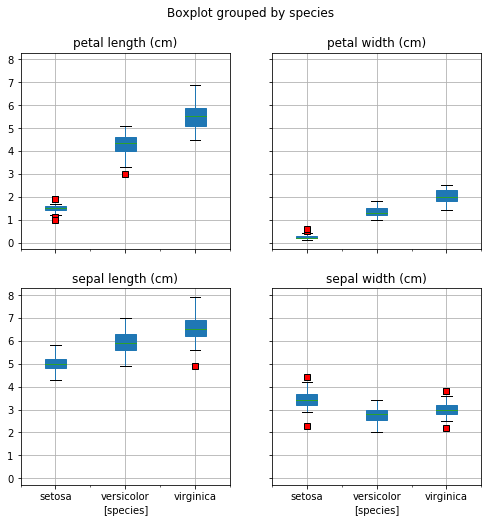

In [73]:
# グラフ化の別方法

# 元のdataframeから直接グラフ作成
# グラフの順番が変化
# y軸とx軸が共通になる

# 下記は必要ない
# plt.figure(figsize=(8, 8))
# plt.tight_layout()
# その他グラフの調整項目
# for

# 箱ひげ図、pltではなくグラフ化したいdataframeから直接boxplot
df.boxplot(by='species', figsize=(8,8),
           flierprops={'markerfacecolor':'r', 'marker':'s'},
           boxprops={'color':'b'}, patch_artist=True)
plt.xticks([1, 2, 3],iris['target_names'])

plt.show()

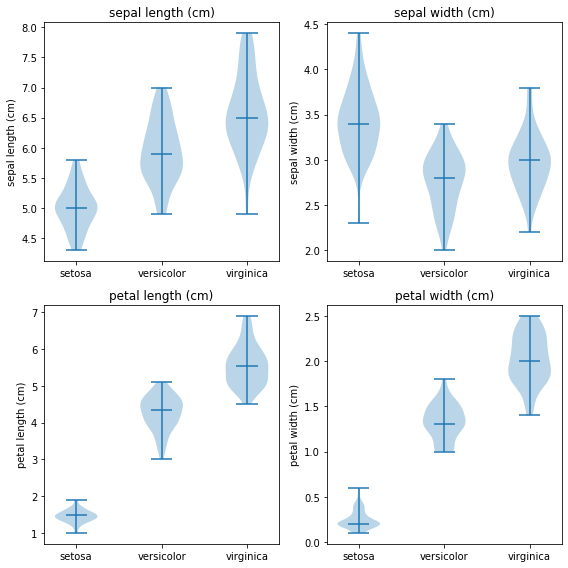

In [62]:
# 特徴量を一つずつ選び、バイオリン図を使って
#ラベルごとのデータの分布を可視化する

# ２×２グラフにするためサイズ調整
plt.figure(figsize=(8, 8))

# forで特徴量毎にリスト化、グラフ作成
for i in range(len(df.columns.values)-1):    

    # 箱ひげ図
    # データはすでにspecies_listに格納されている
    plt.subplot(2, 2, i+1)
    plt.violinplot(species_list[i], showmedians=True)
    plt.title(df.columns.values[i])
    plt.ylabel(df.columns.values[i])
    plt.xticks([1, 2, 3],iris['target_names'])

# ２×２ではグラフが重なるためtight_layout実施
plt.tight_layout()
plt.show()

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

・箱ひげ図　→　四分位数や外れ値が可視化されている。

・バイオリン図　→　データの分布が可視化されている。

# 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。

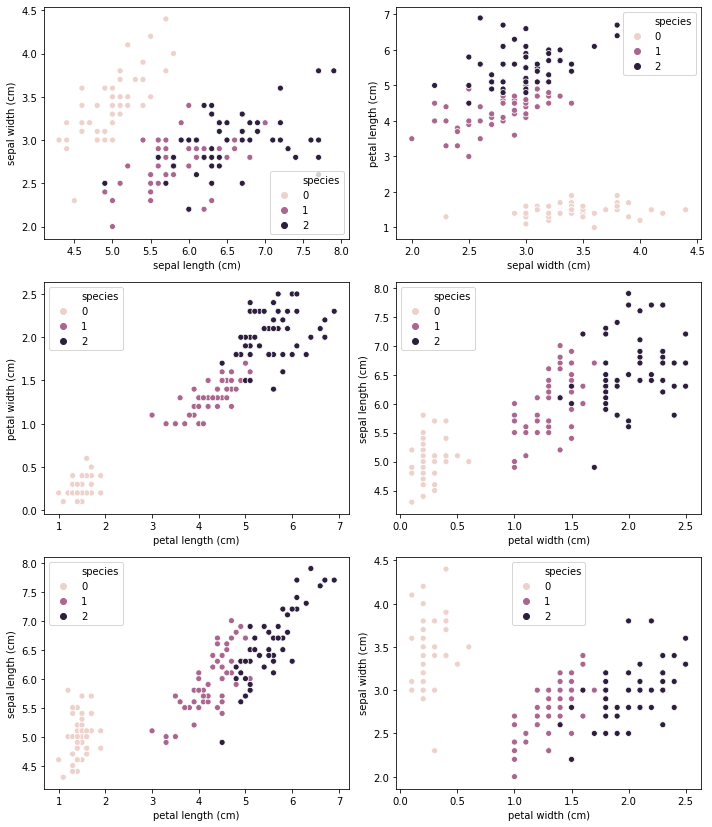

In [63]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

plt.figure(figsize=(10,15))

plt.subplot(421)
sns.scatterplot(df.iloc[:, 0], df.iloc[:, 1], data=df, hue='species')

plt.subplot(422)
sns.scatterplot(df.iloc[:, 1], df.iloc[:, 2], data=df, hue='species')

plt.subplot(423)
sns.scatterplot(df.iloc[:, 2], df.iloc[:, 3], data=df, hue='species')

plt.subplot(424)
sns.scatterplot(df.iloc[:, 3], df.iloc[:, 0], data=df, hue='species')

plt.subplot(425)
sns.scatterplot(df.iloc[:, 2], df.iloc[:, 0], data=df, hue='species')

plt.subplot(426)
sns.scatterplot(df.iloc[:, 3], df.iloc[:, 1], data=df, hue='species')


plt.tight_layout()
plt.show()

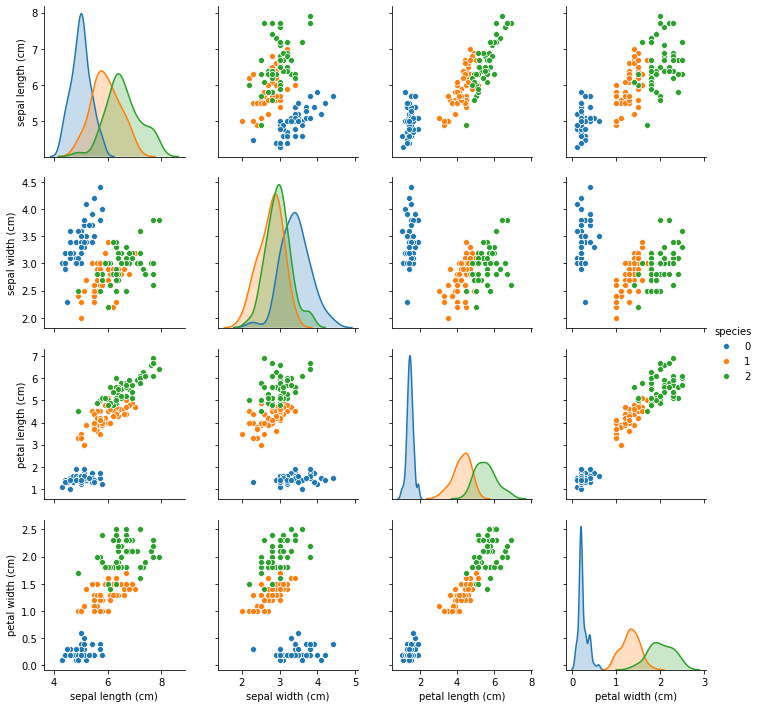

In [64]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

# keyを使用し''species以外で
sns.pairplot(df, hue='species', vars=list(df.keys())[0:4])
plt.show()

In [65]:
# ４つの特徴量に関する相関係数行列を作る

df_corr = df.iloc[:, 0:4].corr(method='pearson')
df_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


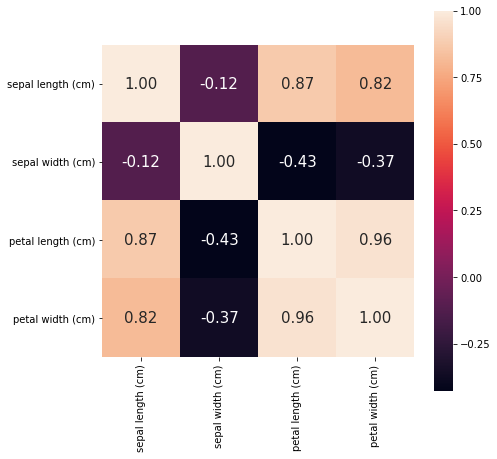

In [66]:
# 相関係数行列のヒートマップを作る

plt.figure(figsize=(7, 7))
sns.heatmap(df_corr, cbar=True, annot=True, square=True,
            fmt='.2f', annot_kws={'size':15})
plt.show()

# 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

petal_lengthとpetal_widthは強い正の相関がある。
petal_lengthとpetal_widthの２つの特徴で３種のアヤメは分類できそう。
setosaは他２種に比べ、各特徴量が小さい領域に分布している。